In [1]:
import tensorflow

In [4]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [5]:
IMAGE_SIZE=[224,224]
train_path = 'Dataset/train'
test_path= 'Dateset/test'

In [6]:
resnet= ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 24s 0us/step


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [8]:
for layer in resnet.layers:
    layer.trainable= False

In [11]:
folders = glob('Datasets/train/*')

In [12]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [13]:
x= Flatten()(resnet.output)

In [14]:
x.shape

TensorShape([None, 100352])

In [15]:
prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs = resnet.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [29]:
test_dtagen = ImageDataGenerator(rescale=1./255)

In [30]:
training_set= train_datagen.flow_from_directory('Datasets/train',
                                               target_size=(224,224),
                                               batch_size =32,
                                               class_mode='categorical')

Found 64 images belonging to 3 classes.


In [31]:
test_set= test_dtagen.flow_from_directory('Datasets/test',
                                               target_size=(224,224),
                                               batch_size =32,
                                               class_mode='categorical')

Found 58 images belonging to 3 classes.


In [32]:
r= model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch= len(training_set),
    validation_steps=len(test_set))

C:\Users\nahassan\AppData\Local\Temp\ipykernel_28072\280597003.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r= model.fit_generator(


Epoch 1/50
2/2 [==============================] - 22s 11s/step - loss: 5.1862 - accuracy: 0.2500 - val_loss: 13.8167 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 12s 8s/step - loss: 7.8888 - accuracy: 0.3906 - val_loss: 4.6157 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 11s 8s/step - loss: 1.6585 - accuracy: 0.5000 - val_loss: 3.9000 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 12s 8s/step - loss: 4.9394 - accuracy: 0.3281 - val_loss: 1.1352 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 12s 8s/step - loss: 1.4665 - accuracy: 0.5938 - val_loss: 5.6732 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 11s 7s/step - loss: 3.5089 - accuracy: 0.4688 - val_loss: 5.7073 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 10s 7s/step - loss: 2.8504 - accuracy: 0.5000 - val_loss: 1.7789 - val_accuracy: 0.2931
Epoch 8/50
2/2 [================

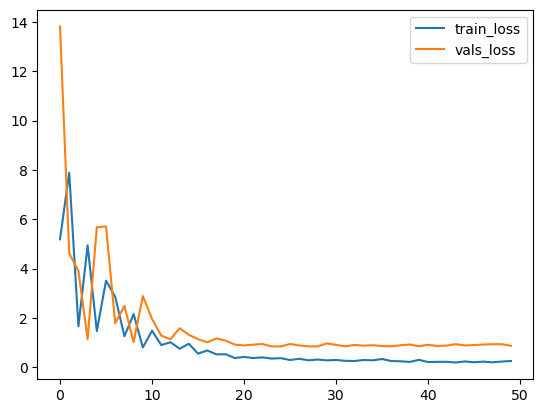

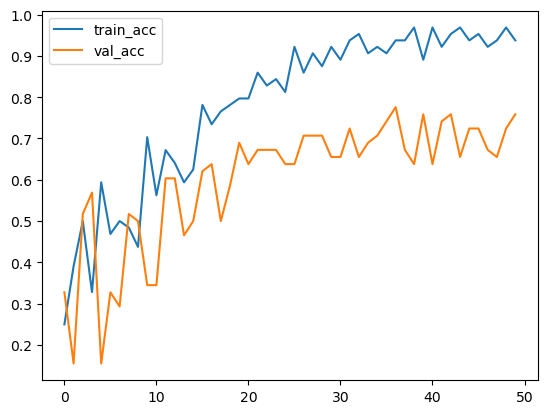

<Figure size 640x480 with 0 Axes>

In [34]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='vals_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [35]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

C:\Users\nahassan\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
y_pred = model.predict(test_set)

2/2 [==============================] - 7s 2s/step


In [37]:
y_pred

array([[4.66213375e-02, 8.35191488e-01, 1.18187182e-01],
       [7.76977744e-03, 4.30849642e-01, 5.61380565e-01],
       [3.34866755e-02, 6.11284673e-01, 3.55228692e-01],
       [2.16711611e-02, 8.56993139e-01, 1.21335760e-01],
       [5.45072496e-01, 1.02788448e-01, 3.52139115e-01],
       [5.73028365e-06, 2.08590063e-03, 9.97908354e-01],
       [9.73610790e-04, 7.21496582e-01, 2.77529746e-01],
       [9.02542025e-02, 5.50780538e-03, 9.04238045e-01],
       [3.13699514e-01, 6.62037849e-01, 2.42626164e-02],
       [7.26392686e-01, 2.21649796e-01, 5.19575924e-02],
       [8.68262351e-01, 9.60445255e-02, 3.56931388e-02],
       [9.76513207e-01, 1.36393216e-02, 9.84745659e-03],
       [3.29822861e-02, 3.83303910e-01, 5.83713889e-01],
       [1.14884647e-02, 9.11125124e-01, 7.73863792e-02],
       [8.24408829e-01, 1.72403514e-01, 3.18757817e-03],
       [2.17352360e-02, 5.32795131e-01, 4.45469588e-01],
       [1.19378485e-01, 1.34637952e-01, 7.45983601e-01],
       [2.32806075e-02, 9.36031

In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2], dtype=int64)

In [41]:
model= load_model('model_resnet50.h5')


In [56]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg', target_size=(224,224))
x= image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [57]:
x.shape

(224, 224, 3)

In [58]:
x= x/255

In [59]:
x= np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

1/1 [==============================] - 0s 169ms/step


array([[0.00394662, 0.00453078, 0.99152255]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data),axis= 1)
a==1

1/1 [==============================] - 0s 153ms/step


array([False])

In [62]:
a

array([2], dtype=int64)